In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import sklearn
from sklearn.preprocessing import LabelEncoder

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

!ls "/content/gdrive/MyDrive/ECE496/datasets"

Mounted at /content/gdrive
mbti_1.csv  mbti_1_mod.csv  mbti_vectorized.npy


In [3]:
dataset_1 = pd.read_csv("/content/gdrive/MyDrive/ECE496/datasets/mbti_1.csv")
print("Dataset information:")
dataset_1.info()

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


In [4]:
print("Example of data:")
dataset_1.head(10)
#Note that posts consist of post seperated by |||

Example of data:


,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...
5,INTJ,'18/37 @.@|||Science is not perfect. No scien...
6,INFJ,"'No, I can't draw on my own nails (haha). Thos..."
7,INTJ,'I tend to build up a collection of things on ...
8,INFJ,"I'm not sure, that's a good question. The dist..."
9,INTP,'https://www.youtube.com/watch?v=w8-egj0y8Qs||...


In [5]:
def text_preprocess(text):

    #strip quotes at beinging/end
    text = text.strip('\'')

    #remove links 
    text = re.sub('https?://\S+', '', text)
    
    #convert to lowercase
    text = text.lower()

    #remove non-words, keep puntuation and numbers in word
    text = re.sub('[^a-zA-Z0-9\'\.\?!\s\-]',' ',text)   
    text = re.sub('[^a-zA-z0-9\.]\.',' ',text)
    text = re.sub('[^a-zA-z0-9\.]\?',' ',text)
    text = re.sub('[^a-zA-z0-9\.]\!',' ',text)
    text = re.sub('[^a-zA-z\s\.][0-9]*[^a-zA-z\s\.]',' ',text)
    if re.match('^[_\W]+$', text): 
      text = ''

    #replace multiple spaces with one
    text = re.sub('\s+',' ',text)
    text = text.strip()

    return text

In [6]:
processed_data = []
for index, row in dataset_1.iterrows():
  posts = row['posts'].split('|||')
  for post in posts:  
    post = text_preprocess(post)
    if len(post) > 0:
      processed_data.append([row['type'], post])

In [7]:
df = pd.DataFrame(processed_data, columns=['type', 'post'])
df.head(10)

,type,post
0,INFJ,enfp and intj moments sportscenter not top ten...
1,INFJ,what has been the most life-changing experienc...
2,INFJ,on repeat for most of today.
3,INFJ,may the perc experience immerse you.
4,INFJ,the last thing my infj friend posted on his fa...
5,INFJ,hello enfj7. sorry to hear of your distress. i...
6,INFJ,welcome and stuff.
7,INFJ,game. set. match.
8,INFJ,prozac wellbrutin at least thirty minutes of m...
9,INFJ,basically come up with three items you've dete...


In [8]:
labels = np.unique(dataset_1['type'])
print("Labels:", labels)

Labels: ['ENFJ' 'ENFP' 'ENTJ' 'ENTP' 'ESFJ' 'ESFP' 'ESTJ' 'ESTP' 'INFJ' 'INFP'
 'INTJ' 'INTP' 'ISFJ' 'ISFP' 'ISTJ' 'ISTP']


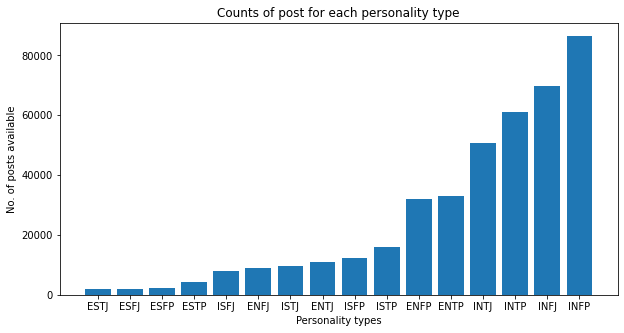

In [9]:
counts = df.groupby(['type']).count()
counts = counts.sort_values(['post'])
plt.figure(figsize=(10,5))
plt.bar(np.array(counts.index), height = counts['post'],)
plt.xlabel('Personality types')
plt.ylabel('No. of posts available')
plt.title('Counts of post for each personality type')
plt.show()

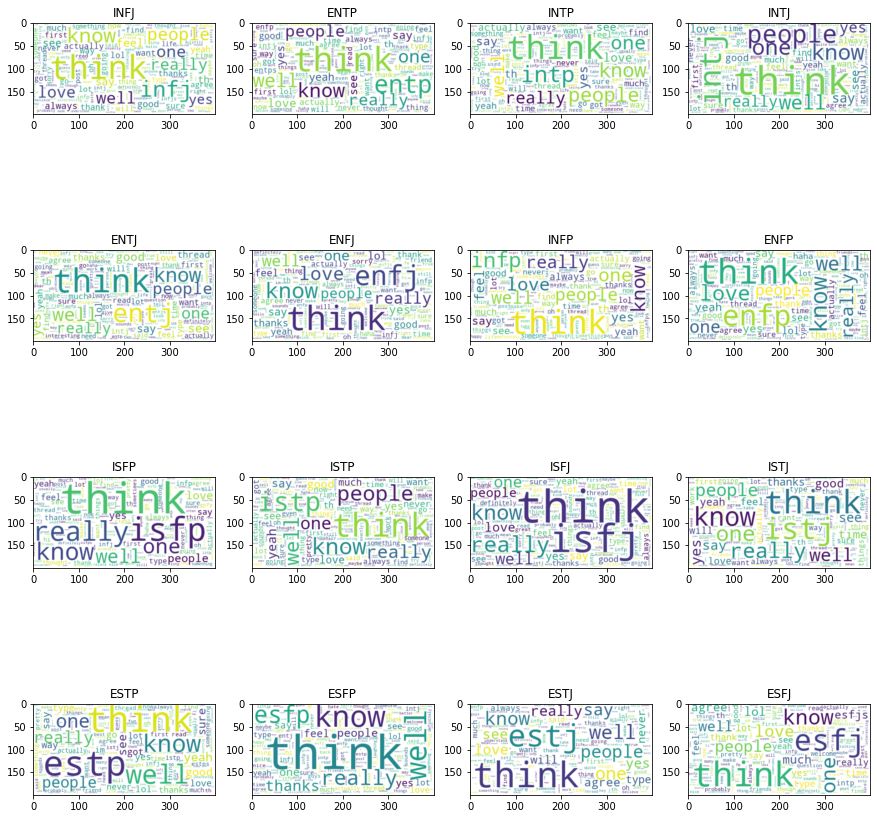

In [10]:
fig, ax = plt.subplots(len(df['type'].unique()), sharex=True, figsize=(15,len(df['type'].unique())))
k = 0
for i in df['type'].unique():
    target_df = df[df['type'] == i]
    wordcloud = WordCloud(max_words=1628,relative_scaling=1,normalize_plurals=False, background_color="white").generate(target_df['post'].to_string())
    plt.subplot(4,4,k+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(i)
    ax[k].axis("off")
    k+=1

In [11]:
encoder = LabelEncoder()
df['encoded_type'] = encoder.fit_transform(df['type'])
print("encode mapping: ")
print({x:encoder.inverse_transform([x])[0] for x in range(16)})
df.head(10)

encode mapping: 
{0: 'ENFJ', 1: 'ENFP', 2: 'ENTJ', 3: 'ENTP', 4: 'ESFJ', 5: 'ESFP', 6: 'ESTJ', 7: 'ESTP', 8: 'INFJ', 9: 'INFP', 10: 'INTJ', 11: 'INTP', 12: 'ISFJ', 13: 'ISFP', 14: 'ISTJ', 15: 'ISTP'}


,type,post,encoded_type
0,INFJ,enfp and intj moments sportscenter not top ten...,8
1,INFJ,what has been the most life-changing experienc...,8
2,INFJ,on repeat for most of today.,8
3,INFJ,may the perc experience immerse you.,8
4,INFJ,the last thing my infj friend posted on his fa...,8
5,INFJ,hello enfj7. sorry to hear of your distress. i...,8
6,INFJ,welcome and stuff.,8
7,INFJ,game. set. match.,8
8,INFJ,prozac wellbrutin at least thirty minutes of m...,8
9,INFJ,basically come up with three items you've dete...,8


In [13]:
df = df.sample(frac=1).reset_index(drop=True)
df.head(10)

,type,post,encoded_type
0,INFJ,dear istp your reactions to fe displays are hi...,8
1,INFJ,well don't be! xd sent from my iphone using ta...,8
2,INFP,bfm from a biological perspective it really is...,9
3,INTJ,i don't know about the full picture .. but the...,10
4,INTJ,i understand that ufo's does not have to be re...,10
5,ESFP,lol i had a habit of falling asleep as soon as...,5
6,INFP,in the end i really just wish people including...,9
7,INFP,still unsure about posting on other types thre...,9
8,INFP,theme song now and forever.,9
9,ENFP,would you rather have a great variety in your ...,1


In [14]:
df['encoded_EI'] = df['type'].astype(str).str[0]
df['encoded_NS'] = df['type'].astype(str).str[1]
df['encoded_FT'] = df['type'].astype(str).str[2]
df['encoded_JP'] = df['type'].astype(str).str[3]
df.head(10)

,type,post,encoded_type,encoded_EI,encoded_NS,encoded_FT,encoded_JP
0,INFJ,dear istp your reactions to fe displays are hi...,8,I,N,F,J
1,INFJ,well don't be! xd sent from my iphone using ta...,8,I,N,F,J
2,INFP,bfm from a biological perspective it really is...,9,I,N,F,P
3,INTJ,i don't know about the full picture .. but the...,10,I,N,T,J
4,INTJ,i understand that ufo's does not have to be re...,10,I,N,T,J
5,ESFP,lol i had a habit of falling asleep as soon as...,5,E,S,F,P
6,INFP,in the end i really just wish people including...,9,I,N,F,P
7,INFP,still unsure about posting on other types thre...,9,I,N,F,P
8,INFP,theme song now and forever.,9,I,N,F,P
9,ENFP,would you rather have a great variety in your ...,1,E,N,F,P


In [15]:
df['encoded_EI'] = encoder.fit_transform(df['encoded_EI'])
df['encoded_NS'] = encoder.fit_transform(df['encoded_NS'])
df['encoded_FT'] = encoder.fit_transform(df['encoded_FT'])
df['encoded_JP'] = encoder.fit_transform(df['encoded_JP'])
df.head(10)

,type,post,encoded_type,encoded_EI,encoded_NS,encoded_FT,encoded_JP
0,INFJ,dear istp your reactions to fe displays are hi...,8,1,0,0,0
1,INFJ,well don't be! xd sent from my iphone using ta...,8,1,0,0,0
2,INFP,bfm from a biological perspective it really is...,9,1,0,0,1
3,INTJ,i don't know about the full picture .. but the...,10,1,0,1,0
4,INTJ,i understand that ufo's does not have to be re...,10,1,0,1,0
5,ESFP,lol i had a habit of falling asleep as soon as...,5,0,1,0,1
6,INFP,in the end i really just wish people including...,9,1,0,0,1
7,INFP,still unsure about posting on other types thre...,9,1,0,0,1
8,INFP,theme song now and forever.,9,1,0,0,1
9,ENFP,would you rather have a great variety in your ...,1,0,0,0,1


In [16]:
df.to_csv("/content/gdrive/MyDrive/ECE496/datasets/mbti_processed.csv", index=False)  